In [54]:
# import the packages
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
# Getting the data
Cust_acqu = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 2 - Credit Card Case Study/Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
Repa = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 2 - Credit Card Case Study/Case Study 2 - Credit Card Case Study/Repayment.csv')
Spen = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 2 - Credit Card Case Study/Case Study 2 - Credit Card Case Study/spend.csv')


In [62]:
Cust_acqu.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [100]:
Repa.head(3)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN


In [134]:
Repa.drop('Unnamed: 4', axis = 1, inplace = True)
Repa = Repa.dropna(subset=['Customer'])
Repa.head(3)

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06


In [18]:
Spen.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


# BUSINESS PROBLEMS:


### 1. In the above dataset :

#### a. In case age is less than 18, replace it with mean of age values.


In [104]:
Cust_acqu.loc[Cust_acqu['Age'] < 18,'Age'] = Cust_acqu['Age'].mean()

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [105]:
cust_spend = pd.merge(left = Cust_acqu,right = Spen, on = "Customer", how = "inner")
cust_spend[cust_spend["Amount"] > cust_spend['Limit']]
cust_spend.loc[cust_spend["Amount"] > cust_spend["Limit"],"Amount"] = (0.5 * cust_spend["Limit"])

#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [109]:
cust_repay= pd.merge(left = Repa, right = Cust_acqu, on = "Customer", how = "inner")
cust_repay.loc[cust_repay["Amount"] > cust_repay["Limit"],"Amount"] = cust_repay["Limit"]

### 2. From the above dataset create the following summaries:

####  a. How many distinct customers exist?


In [114]:
Cust_acqu.Customer.nunique()

100

####  b. How many distinct categories exist?


In [117]:
# No. of different categories of spending type
Spen.Type.nunique()

15

In [118]:
# No. of different categories of customer segment type
Cust_acqu.Segment.nunique()

5

In [119]:
# No. of different categories of Product type
Cust_acqu.Product.nunique()

3

#### c. What is the average monthly spend by customers?


In [175]:
cust_spend = pd.merge(left = Cust_acqu,right = Spen, on = "Customer", how = "inner")
cust_spend['Spend_Month'] = cust_spend.Month.apply(lambda x: dt.datetime.strptime(x,"%d-%b-%y"))
cust_spend = cust_spend.set_index("Spend_Month")
cust_spend.groupby([cust_spend.index.year,cust_spend.index.month])[['Amount']].mean()


Amount
Spend_Month Spend_Month               
2004        1            251712.068664
            2            221215.270000
            3            232146.119286
            4            235272.037143
            5            217539.236429
            9            310923.383571
            11           270486.397857
2005        1            292741.372857
            2            229802.279821
            4            252181.326429
            5            245696.515429
            6            262688.112857
            7            229116.663571
            8            233734.634286
            9            188666.202143
            10           194568.640714
            11           286143.322857
            12           147503.060000
2006        1            282058.006429
            2            253858.260714
            3            247166.084654
            4            232468.967553
            5            236162.740357
            6            177252.386429
            7            287505.098929
            8            240699.717143
            9            158520.090714
            10           236136.335000
            11           182841.290000
            12           270470.980714

#### d. What is the average monthly repayment by customers?


In [176]:
A = Repa
A['Repayment_Month'] = A.Month.apply(lambda x: dt.datetime.strptime(x,"%d-%b-%y"))
A = A.set_index("Repayment_Month")
A.groupby([A.index.year,A.index.month])[['Amount']].mean()


Amount
Repayment_Month Repayment_Month               
2004            1                243489.649786
                2                256702.630741
                3                252585.280667
                4                259141.679000
                5                226162.720800
                9                184487.848750
                11               209592.238000
2005            1                240548.098148
                2                238829.265123
                4                212688.631333
                5                263207.367857
                6                210199.818333
                7                239871.479167
                8                264430.921622
                9                247700.170000
                10               219849.956667
                11               256695.120000
                12               320379.335833
2006            1                293475.389167
                2                284489.565128
                3                240851.266814
                4                275472.251889
                5                256920.884943
                6                251990.453333
                7                257936.383243
                8                224143.992500
                9                262533.880833
                10               260765.480000
                11               199399.197407
                12               252736.569167

####  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
###### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [269]:
cust_spend_repay = pd.merge(left = Spen, right = Repa, on = "Customer", how = "inner")
cust_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)
cust_spend_repay['R_date'] = cust_spend_repay.Month_x.apply(lambda x: dt.datetime.strptime(x,"%d-%b-%y"))
cust_spend_repay['Monthly'] = cust_spend_repay['R_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_spend_repay['Yearly'] = cust_spend_repay['R_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
interest_group = cust_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()
interest_group['Monthly Profit'] = interest_group['Repay_Amount'] - interest_group['Spend_Amount']
interest_group.loc[interest_group['Monthly Profit'] < 0, 'Monthly Profit'] = 0
interest_group['Interest Earned'] = (0.029* interest_group['Monthly Profit'])
interest_group 


C:\Users\Vaibhav Dewat\AppData\Local\Temp\ipykernel_2496\2231833979.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = cust_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()


Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      1.664730e+08  1.795128e+08     13039815.22     3.781546e+05
       February   1.469321e+08  1.736560e+08     26723817.82     7.749907e+05
       January    1.897246e+09  1.873917e+09            0.00     0.000000e+00
       March      8.938031e+07  9.071044e+07      1330130.32     3.857378e+04
       May        7.845624e+07  9.187162e+07     13415377.71     3.890460e+05
       November   9.321587e+07  8.943304e+07            0.00     0.000000e+00
       September  1.113694e+08  9.273326e+07            0.00     0.000000e+00
2005   April      1.985560e+08  1.944499e+08            0.00     0.000000e+00
       August     1.680120e+08  1.731517e+08      5139659.65     1.490501e+05
       December   5.088172e+07  8.954003e+07     38658310.50     1.121091e+06
       February   9.634808e+08  1.040628e+09     77146942.29     2.237261e+06
       January    2.227449e+08  1.796611e+08            0.00     0.000000e+00
       July       9.057456e+07  9.981389e+07      9239324.06     2.679404e+05
       June       3.216256e+08  3.144390e+08            0.00     0.000000e+00
       May        8.853393e+08  8.895885e+08      4249143.97     1.232252e+05
       November   3.057800e+08  2.582066e+08            0.00     0.000000e+00
       October    6.218014e+07  8.525009e+07     23069950.14     6.690286e+05
       September  6.404540e+07  7.888690e+07     14841497.81     4.304034e+05
2006   April      5.439827e+08  5.748955e+08     30912753.87     8.964699e+05
       August     9.520109e+07  1.017625e+08      6561439.98     1.902818e+05
       December   7.984531e+07  7.571813e+07            0.00     0.000000e+00
       February   2.529986e+08  2.372385e+08            0.00     0.000000e+00
       January    9.837846e+07  8.570876e+07            0.00     0.000000e+00
       July       2.165067e+08  1.858434e+08            0.00     0.000000e+00
       June       6.642966e+07  9.192668e+07     25497024.41     7.394137e+05
       March      1.274427e+09  1.282546e+09      8118766.68     2.354442e+05
       May        3.090216e+08  3.287737e+08     19752063.16     5.728098e+05
       November   1.141199e+08  1.590248e+08     44904869.22     1.302241e+06
       October    9.159175e+07  9.611769e+07      4525937.50     1.312522e+05
       September  6.765554e+07  9.996138e+07     32305840.26     9.368694e+05

 ####  f. What are the top 5 product types?



In [271]:
# There are only 3 products in given sample
Cust_acqu.Product.value_counts()

Gold        38
Platimum    32
Silver      30
Name: Product, dtype: int64

In [274]:
# Top 5 spend type if the quetion is about spend type 
Spen.Type.value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

####  g. Which city is having maximum spend?


In [283]:
cust_spend = pd.merge(left = Cust_acqu,right = Spen, on = "Customer", how = "right")
cust_spend.groupby(by = 'City')[['Amount']].sum().sort_values(by = 'Amount', ascending = False)

# COCHIN has the maximum spending customers

,Amount
City,
COCHIN,73495349.26
BANGALORE,69342631.62
CALCUTTA,64415760.01
BOMBAY,50828266.74
CHENNAI,32674988.07
TRIVANDRUM,25761239.41
PATNA,24609274.54
DELHI,23516564.54


#### h. Which age group is spending more money?


In [285]:
cust_spend["Age Group"] =  pd.cut(cust_spend["Age"],bins = np.arange(18,88,8), labels = ["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"], include_lowest = True)
cust_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)

Age Group
26-34    71076544.85
34-42    61658185.23
42-50    49227056.39
50-58    48600571.86
18-26    34913392.94
66-74    33550294.60
58-66    27096196.49
74-82    22234756.69
Name: Amount, dtype: float64

#### i. Who are the top 10 customers in terms of repayment?


In [289]:
Repa.groupby('Customer')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [296]:
cust_spend['R_date'] = cust_spend.Month.apply(lambda x: dt.datetime.strptime(x,"%d-%b-%y"))
cust_spend['Year'] = cust_spend['R_date'].apply(lambda x:pd.Timestamp.strftime(x,format = "%Y"))
cust_spend_pivot = pd.pivot_table(data = cust_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")
cust_spend_pivot

Product                 Gold     Platimum      Silver
City       Year                                      
BANGALORE  2004   9289878.54   6046763.93  6773901.65
           2005  12892362.99   7784194.68  3936068.22
           2006  12030611.09   5620904.86  4967945.66
BOMBAY     2004   6987853.53   5199581.00  3061805.08
           2005   8983018.28   5134074.48  2368375.97
           2006   7917144.31   7547549.72  3628864.37
CALCUTTA   2004   7477140.98   5961165.93  3321963.10
           2005  10303355.80   8810284.03  1285609.11
           2006  11167532.77  11305526.03  4783182.26
CHENNAI    2004   1059618.50   5558572.68  1156129.37
           2005   3740945.58   8868435.43  1000540.48
           2006   2704288.62   6921130.79  1665326.62
COCHIN     2004   7315850.15   8472832.23  4587738.70
           2005  12110613.03  10856722.82  2619231.25
           2006  10499142.38  12453968.83  4579249.87
DELHI      2004   2806495.00   1565199.90  4293224.28
           2005   1964845.27   2068490.16  2515127.59
           2006   2957103.32    764247.73  4581831.29
PATNA      2004   2072567.90   1113069.60  3398795.65
           2005   3252615.77   2883231.07  5244763.90
           2006   2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004   2415102.84   3761433.87   795897.19
           2005   1240375.85   7186762.35  1445540.63
           2006   2735710.87   4174473.45  2005942.36

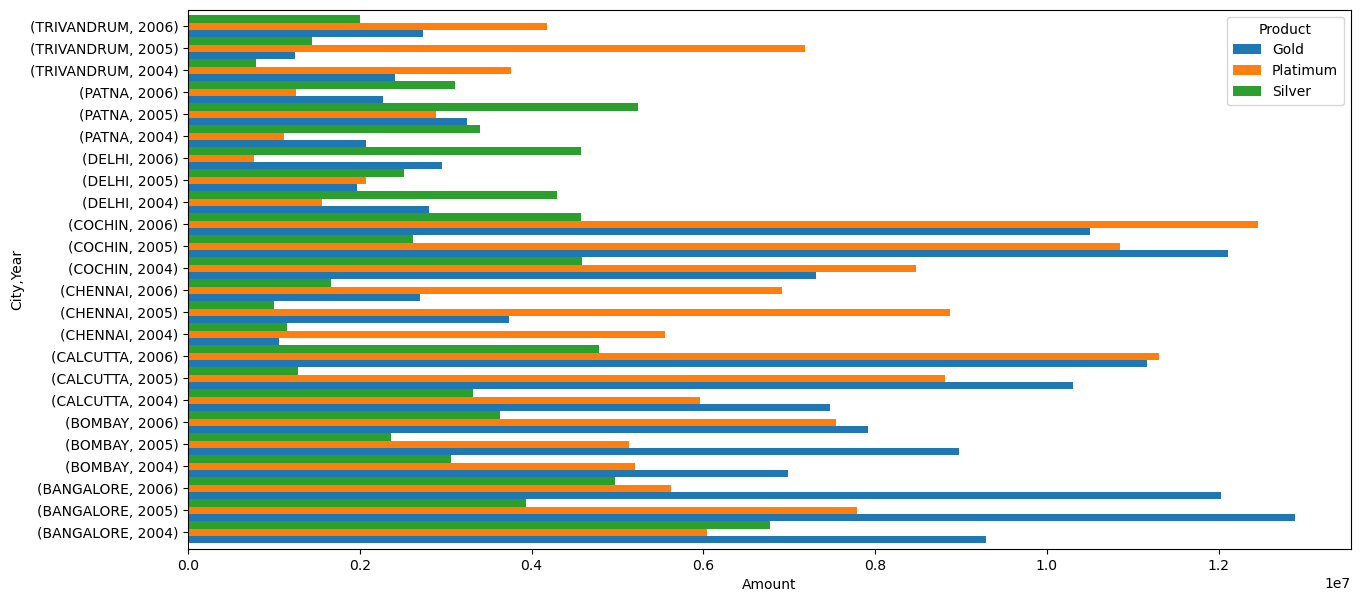

In [307]:
cust_spend_pivot.plot(kind = "barh", figsize = (15,7), width = 1)
plt.xlabel("Amount")
plt.show()

### 4. Create graphs for: 

####  a. Monthly comparison of total spends, city wise


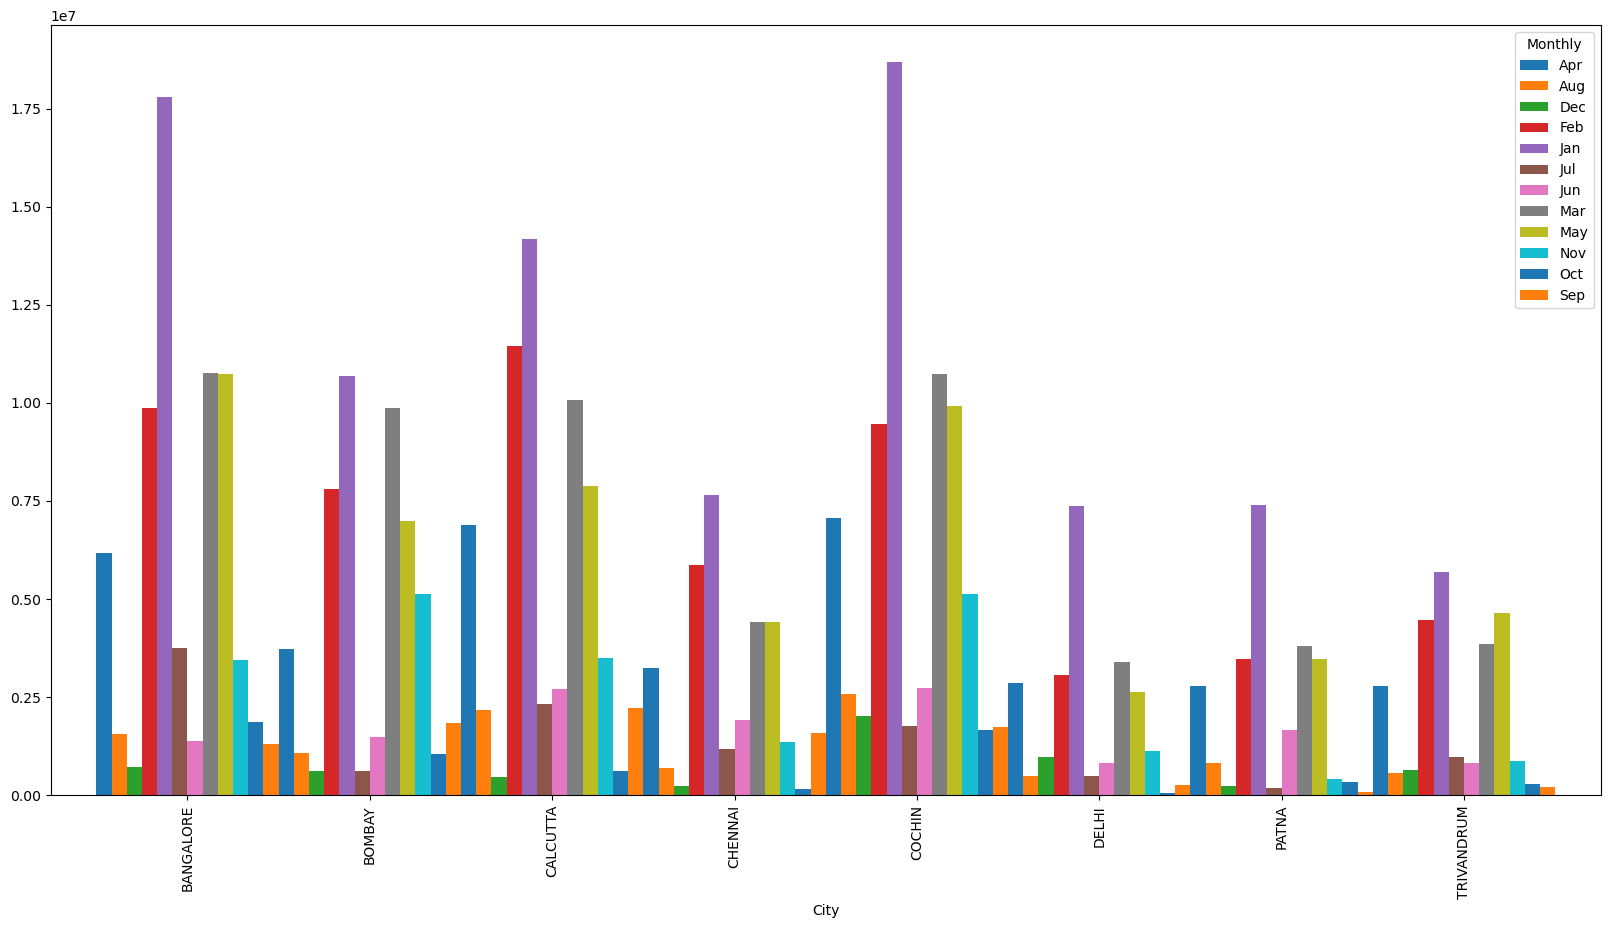

In [318]:
cust_spend['Monthly'] = cust_spend['R_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))
city_M = pd.pivot_table(data = cust_spend, values = 'Amount', index = 'City', columns = 'Monthly', aggfunc = 'sum')
city_M.plot(kind = "bar", figsize = (20,10), width = 1)
plt.show()

#### b. Comparison of yearly spend on air tickets


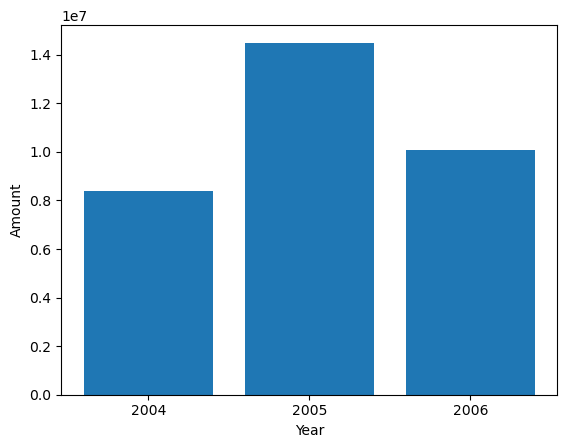

In [325]:
AT = cust_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()
AT = AT.loc[AT["Type"] == "AIR TICKET"]
plt.bar(AT ["Year"],height = AT["Amount"])
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

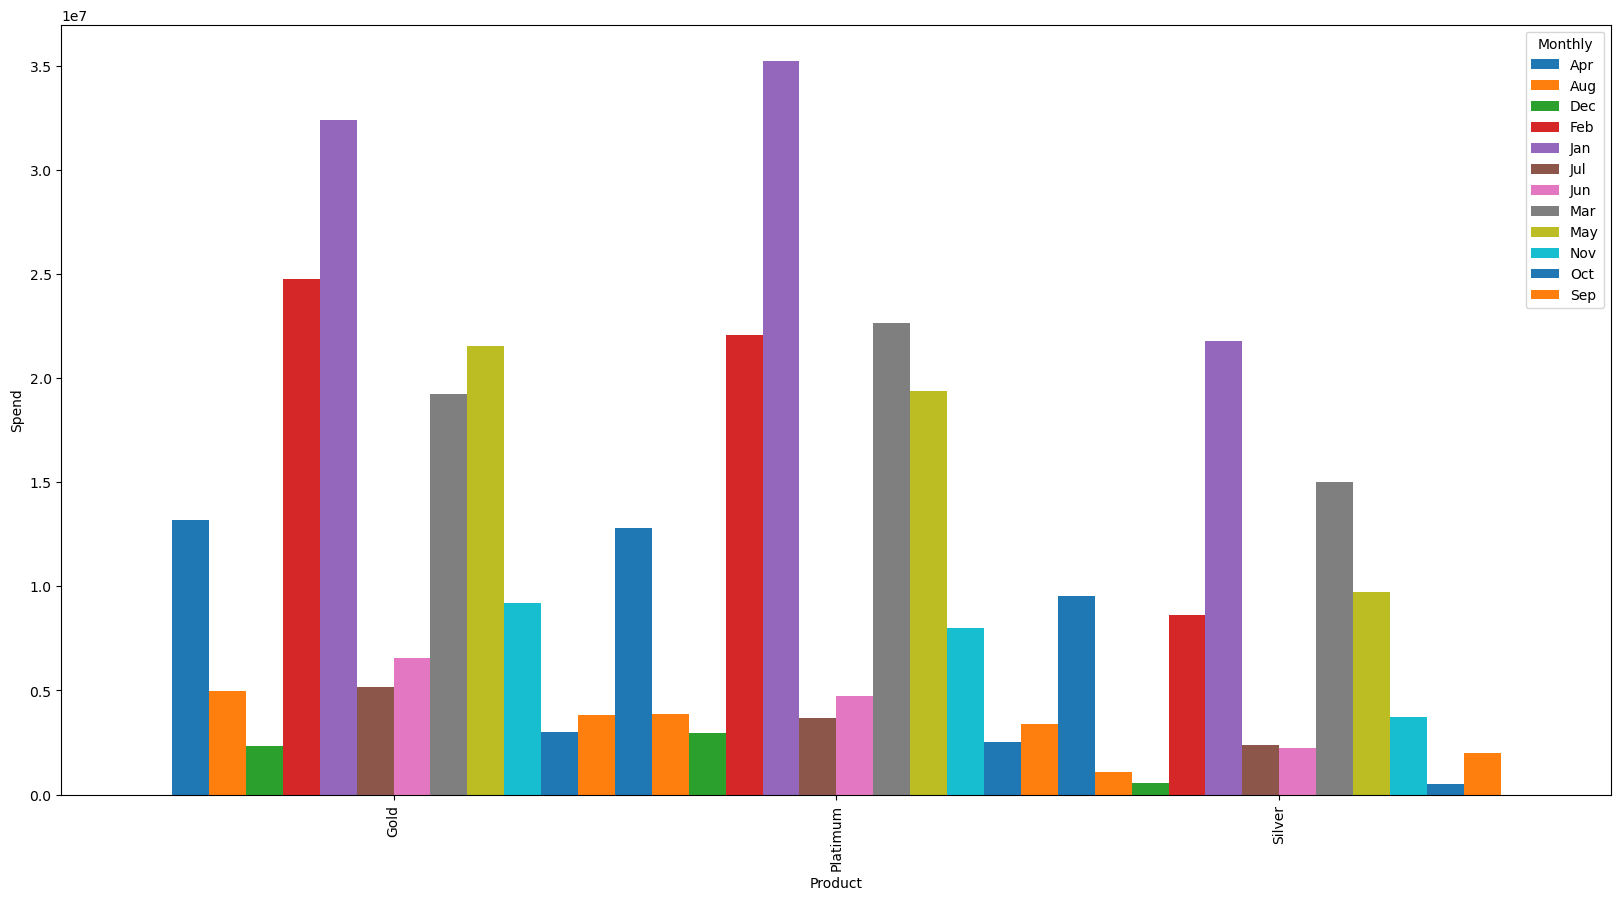

In [328]:
pro = pd.pivot_table(data = cust_spend, index = 'Product', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
pro.plot(kind = "bar", figsize = (20,10), width = 1)
plt.ylabel("Spend")
plt.show()

# As per results it seems that the customers spent more in January maybe due to New year regardless to what product they have

### 5. Write user defined PYTHON function to perform the following analysis:

#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [369]:
Repa_cust = pd.merge(left = Cust_acqu, right = Repa, on = "Customer", how = "right")
def top_cust(product, timeperiod):
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = Repa_cust.pivot_table(index=['Product','City','Customer'],columns='Repay_month',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        result['Total_spend'] = result.sum(axis = 1)
        result = result.nlargest(10, 'Total_spend')
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = Repa_cust.pivot_table(index=['Product','City','Customer'],columns='Repay_year',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        result['Total_spend'] = result.sum(axis = 1)
        result = result.nlargest(10, 'Total_spend')
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = Repa_cust.pivot_table(index=['Product','City','Customer'],columns='Repay_month',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        result['Total_spend'] = result.sum(axis = 1)
        result = result.nlargest(10, 'Total_spend')
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = Repa_cust.pivot_table(index=['Product','City','Customer'],columns='Repay_year',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        result['Total_spend'] = result.sum(axis = 1)
        result = result.nlargest(10, 'Total_spend')
    elif product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = Repa_cust.pivot_table(index=['Product','City','Customer'],columns='Repay_month',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        result['Total_spend'] = result.sum(axis = 1)
        result = result.nlargest(10, 'Total_spend')
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = Repa_cust.pivot_table(index=['Product','City','Customer'],columns='Repay_year',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        result['Total_spend'] = result.sum(axis = 1)
        result = result.nlargest(10, 'Total_spend')
    return result

In [370]:
# For example for Platinum and monthly 

top_cust('Platinum','monthly')


C:\Users\Vaibhav Dewat\AppData\Local\Temp\ipykernel_2496\2314999599.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Total_spend'] = result.sum(axis = 1)


Repay_month                          Apr         Aug        Dec         Feb  \
Product  City       Customer                                                  
Platimum COCHIN     A21        877084.23  1321914.34  489260.28  1273008.15   
         TRIVANDRUM A48       1319286.12         NaN        NaN  1197704.45   
                    A39        472407.74         NaN  278687.47  1212860.65   
         BOMBAY     A36       1670108.19   298497.43  146321.26  1143572.07   
         BANGALORE  A37       1028530.57   368760.27  343316.99  1106271.48   
         CHENNAI    A38        369151.51         NaN  492660.82  1365681.76   
                    A47        933984.21         NaN        NaN  1847459.98   
         CALCUTTA   A40              NaN   488742.81  169786.15   937643.24   
                    A49        839940.72   321122.85   60465.21  1443241.60   
         COCHIN     A54       1025491.68         NaN  215719.14  1149119.64   

Repay_month                          Jan        Jul        Jun         Mar  \
Product  City       Customer                                                 
Platimum COCHIN     A21       2461631.77  108209.03  390402.40   867387.56   
         TRIVANDRUM A48        884683.42  286146.08  419150.74  1532981.58   
                    A39       1565119.57  343050.41  235033.71  1141202.46   
         BOMBAY     A36        883551.47  213919.73  165533.79   345065.63   
         BANGALORE  A37       1146853.78        NaN  606994.42   643390.71   
         CHENNAI    A38       1655584.31        NaN  215272.04   775994.68   
                    A47       1301707.96        NaN  784729.83   806655.09   
         CALCUTTA   A40       1749083.51  242107.49        NaN  1176947.70   
                    A49        814593.08  172212.79  849623.74  1128617.99   
         COCHIN     A54       1154398.99        NaN        NaN   100719.74   

Repay_month                          May         Nov        Oct        Sep  \
Product  City       Customer                                                 
Platimum COCHIN     A21        548382.97   269546.03        NaN  449509.39   
         TRIVANDRUM A48       2022268.01   630196.35        NaN        NaN   
                    A39       1668976.58   705144.71        NaN        NaN   
         BOMBAY     A36        316914.74  1321419.05  234343.03  835519.49   
         BANGALORE  A37        602852.30  1318460.61   86820.21  283553.49   
         CHENNAI    A38        981011.33   952412.81  317309.23  345877.86   
                    A47       1220587.06    32967.03  358785.80        NaN   
         CALCUTTA   A40       1401293.97   825144.40        NaN        NaN   
                    A49       1199140.48    78156.90        NaN        NaN   
         COCHIN     A54        494339.29   703624.89  241392.80  490775.95   

Repay_month                   Total_spend  
Product  City       Customer               
Platimum COCHIN     A21        9056336.15  
         TRIVANDRUM A48        8292416.75  
                    A39        7622483.30  
         BOMBAY     A36        7574765.88  
         BANGALORE  A37        7535804.83  
         CHENNAI    A38        7470956.35  
                    A47        7286876.96  
         CALCUTTA   A40        6990749.27  
                    A49        6907115.36  
         COCHIN     A54        5575582.12

# THE END